In [1]:
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [11]:
from sklearn.decomposition import PCA as sklearnPCA

# Sigs Patients

In [113]:
#Read in Signatures of the sequences from brain cancer data
sp = pd.read_csv('sigs_patients.txt', sep ='\t').T

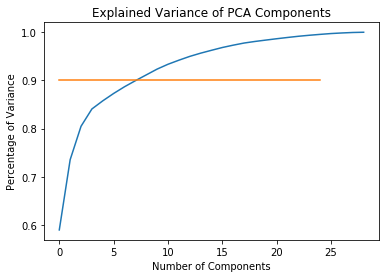

In [213]:
pca = sklearnPCA()
Y_test = pca.fit_transform(sp)
evr = pca.explained_variance_ratio_
var = list()
for i in range(1,len(evr)):
    var.append(sum(evr[:-i]))
var = var[::-1]
plt.plot(var)
plt.plot(np.arange(25),[0.9]*25)
plt.title('Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance')

Use 7 components for 90% of the variance.

In [180]:
sklearn_pca = sklearnPCA(n_components=7)
Y = sklearn_pca.fit_transform(sp)

In [203]:
hold = list()
for i in range(1,40):
    km = KMeans(i,n_init=25)
    km.fit(Y)
    hold.append(km.score(Y))

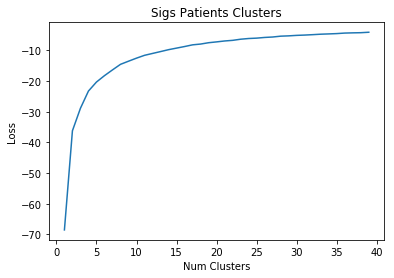

In [354]:
plt.plot(np.arange(1,len(hold)+1),hold)

plt.xlabel('Num Clusters')
plt.ylabel('Loss')
plt.title('Sigs Patients Clusters')

In [205]:
#Fit 7 clusters to the reduced data
km = KMeans(7,n_init=25)
km.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=25, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [210]:
#Read in Onno data, reduce dim, predict cluster
so = pd.read_csv('sigs_onno1.txt', sep ='\t').T
Y_so = sklearn_pca.transform(so)
onno_cluster = km.predict(Y_so)

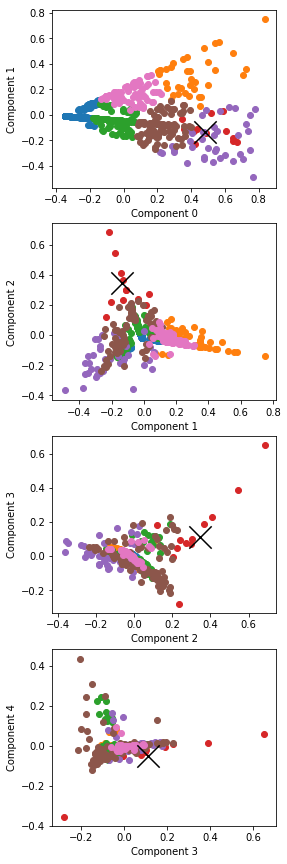

In [359]:
classes = km.predict(Y)
f = plt.figure(figsize=[4,15])
plt.title('Sequence-based Clusters')
plt.subplot(411)
for i in range(7):
    plt.scatter(Y[:,0][classes==i],Y[:,1][classes==i])
plt.scatter(Y_so1[:,0],Y_so1[:,1],c='k',s=500,marker='x')
plt.xlabel('Component 0')
plt.ylabel('Component 1')

plt.subplot(412)
for i in range(7):
    plt.scatter(Y[:,1][classes==i],Y[:,2][classes==i])
plt.scatter(Y_so1[:,1],Y_so1[:,2],c='k',s=500,marker='x')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(413)
for i in range(7):
    plt.scatter(Y[:,2][classes==i],Y[:,3][classes==i])
plt.scatter(Y_so1[:,2],Y_so1[:,3],c='k',s=500,marker='x')
plt.xlabel('Component 2')
plt.ylabel('Component 3')

plt.subplot(414)
for i in range(7):
    plt.scatter(Y[:,3][classes==i],Y[:,4][classes==i])
plt.scatter(Y_so1[:,3],Y_so1[:,4],c='k',s=500,marker='x')
plt.xlabel('Component 3')
plt.ylabel('Component 4')
f.savefig('Sig Clusters',dpi=1000)

In [212]:
#Patients in Onno's cluster
np.array(sp.index)[classes==onno_cluster]

array(['06-0178-01', '06-5856-01', '14-0871-01', 'CS-4938-01',
       'DU-7298-01', 'HT-7476-01', 'HT-7483-01', 'HT-8106-01',
       'HT-8558-01', 'P5-A5EV-01', 'P5-A5EY-01', 'QH-A65S-01'], dtype=object)

# Biol Patient

In [337]:
bp = pd.read_csv('biol_patient.txt', sep ='\t')

In [338]:
#Remove names, drop outlier
bp = bp.drop('go',1)
bp = bp.T
bp = bp.drop('LGG_HT-8564-01')

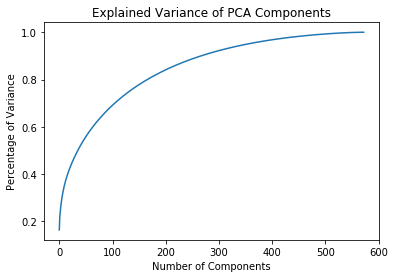

In [339]:
pca_bp = sklearnPCA()
pca_bp.fit_transform(bp)
evr = pca_bp.explained_variance_ratio_
var = list()
for i in range(1,len(evr)):
    var.append(sum(evr[:-i]))
var = var[::-1]
plt.plot(var)
plt.title('Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance')

In [340]:
num = min(var, key=lambda x:abs(x-0.8))
n_comp = var.index(num)
print(n_comp)

165


In [341]:
pca_bp = sklearnPCA(n_components=n_comp)
Y_bp = pca_bp.fit_transform(bp)

In [342]:
hold_bp = list()
for i in range(1,40):
    km_bp = KMeans(i,n_init=25)
    km_bp.fit(Y_bp)
    hold_bp.append(km_bp.score(Y_bp))

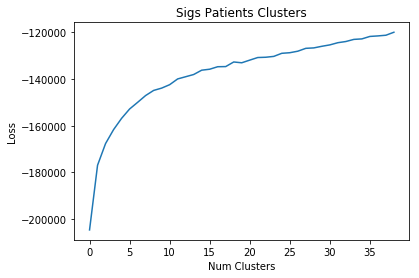

In [343]:
plt.plot(hold_bp)

plt.xlabel('Num Clusters')
plt.ylabel('Loss')
plt.title('Sigs Patients Clusters')

Fit 5 clusters

In [344]:
#Fit 5 clusters to the reduced data
km_bp = KMeans(5,n_init=25)
km_bp.fit(Y_bp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=25, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [368]:
ob = pd.read_csv('onno_biol.txt', sep ='\t',header=None)
ob = ob[1]
ob = ob.T
O_bp = pca_bp.transform(ob)
onno_cluster = km_bp.predict(O_bp)

C:\Python\Python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [373]:
onno_cluster_bp = km_bp.predict(O_bp)
print(onno_cluster_bp)

[3]


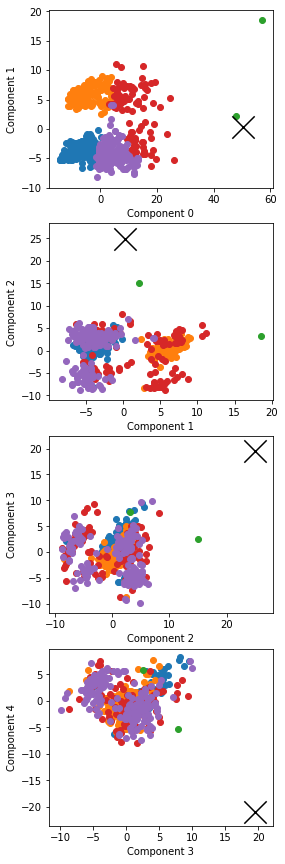

In [379]:
classes = km_bp.predict(Y_bp)
f = plt.figure(figsize=[4,15])
plt.title('Sequence-based Clusters')
plt.subplot(411)
for i in range(7):
    plt.scatter(Y_bp[:,0][classes==i],Y_bp[:,1][classes==i])
plt.scatter(O_bp[:,0],O_bp[:,1],c='k',s=500,marker='x')
plt.xlabel('Component 0')
plt.ylabel('Component 1')

plt.subplot(412)
for i in range(7):
    plt.scatter(Y_bp[:,1][classes==i],Y_bp[:,2][classes==i])
plt.scatter(O_bp[:,1],O_bp[:,2],c='k',s=500,marker='x')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(413)
for i in range(7):
    plt.scatter(Y_bp[:,2][classes==i],Y_bp[:,3][classes==i])
plt.scatter(O_bp[:,2],O_bp[:,3],c='k',s=500,marker='x')
plt.xlabel('Component 2')
plt.ylabel('Component 3')

plt.subplot(414)
for i in range(7):
    plt.scatter(Y_bp[:,3][classes==i],Y_bp[:,4][classes==i])
plt.scatter(O_bp[:,3],O_bp[:,4],c='k',s=500,marker='x')
plt.xlabel('Component 3')
plt.ylabel('Component 4')

f.savefig('Biol_clusters_long',dpi=1000)


# Biol Enr Patient

In [302]:
bep = pd.read_csv('biol_enr_patient.txt', sep ='\t')

In [304]:
#Remove names, drop outlier
bep = bep.drop('go',1)
bep = bep.T
bep = bep.drop('LGG_HT-8564-01')

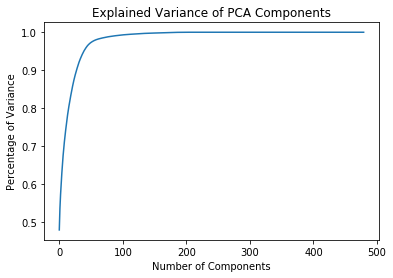

In [313]:
pca_bep = sklearnPCA()
pca_bep.fit_transform(bep)
evr = pca_bep.explained_variance_ratio_
var = list()
for i in range(1,len(evr)):
    var.append(sum(evr[:-i]))
var = var[::-1]
plt.plot(var)
plt.title('Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance')

In [314]:
num = min(var, key=lambda x:abs(x-0.8))
n_comp = var.index(num)
print(n_comp)

15


In [315]:
pca_bep = sklearnPCA(n_components=n_comp)
Y_bep = pca_bep.fit_transform(bep)

In [316]:
hold_bep = list()
for i in range(1,40):
    km_bep = KMeans(i,n_init=25)
    km_bep.fit(Y_bep)
    hold_bep.append(km_bep.score(Y_bep))

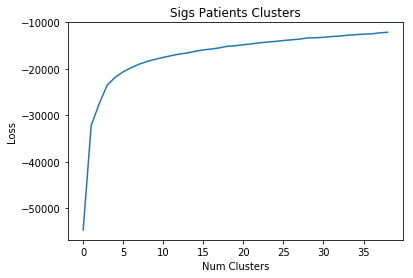

In [317]:
plt.plot(hold_bep)

plt.xlabel('Num Clusters')
plt.ylabel('Loss')
plt.title('Sigs Patients Clusters')

In [321]:
#3 clusters
#Fit 5 clusters to the reduced data
km_bep = KMeans(3,n_init=25)
km_bep.fit(Y_bep)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=25, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

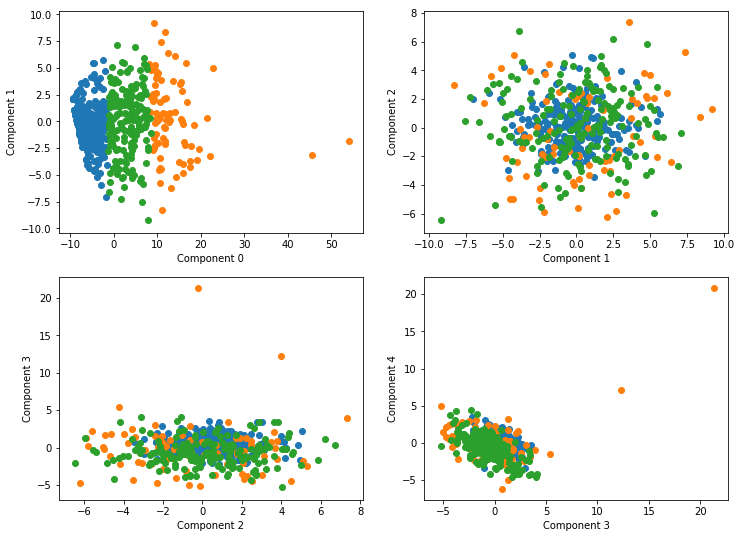

In [322]:
classes = km_bep.predict(Y_bep)
f = plt.figure(figsize=[12,9])
plt.title('Sequence-based Clusters')
plt.subplot(221)
for i in range(7):
    plt.scatter(Y_bep[:,0][classes==i],Y_bep[:,1][classes==i])
#plt.scatter(Y_so1[:,0],Y_so1[:,1],c='k',s=500,marker='x')
plt.xlabel('Component 0')
plt.ylabel('Component 1')

plt.subplot(222)
for i in range(7):
    plt.scatter(Y_bep[:,1][classes==i],Y_bep[:,2][classes==i])
#plt.scatter(Y_so1[:,1],Y_so1[:,2],c='k',s=500,marker='x')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(223)
for i in range(7):
    plt.scatter(Y_bep[:,2][classes==i],Y_bep[:,3][classes==i])
#plt.scatter(Y_so1[:,2],Y_so1[:,3],c='k',s=500,marker='x')
plt.xlabel('Component 2')
plt.ylabel('Component 3')

plt.subplot(224)
for i in range(7):
    plt.scatter(Y_bep[:,3][classes==i],Y_bep[:,4][classes==i])
#plt.scatter(Y_so1[:,3],Y_so1[:,4],c='k',s=500,marker='x')
plt.xlabel('Component 3')
plt.ylabel('Component 4')


# Molec Enr Patient

In [323]:
mep = pd.read_csv('molec_enr_patient.txt', sep ='\t')

In [325]:
#Remove names, drop outlier
mep = mep.drop('go',1)
mep = mep.T
mep = mep.drop('LGG_HT-8564-01')

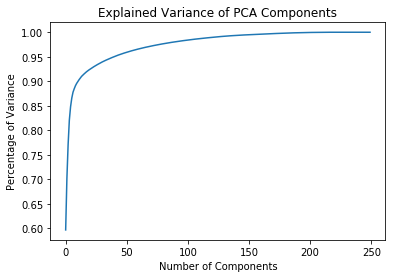

In [326]:
pca_mep = sklearnPCA()
pca_mep.fit_transform(mep)
evr = pca_mep.explained_variance_ratio_
var = list()
for i in range(1,len(evr)):
    var.append(sum(evr[:-i]))
var = var[::-1]
plt.plot(var)
plt.title('Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance')

In [328]:
num = min(var, key=lambda x:abs(x-0.9))
n_comp = var.index(num)
print(n_comp)

10


In [331]:
pca_mep = sklearnPCA(n_components=n_comp)
Y_mep = pca_mep.fit_transform(mep)

In [332]:
hold_mep = list()
for i in range(1,40):
    km_mep = KMeans(i,n_init=25)
    km_mep.fit(Y_mep)
    hold_mep.append(km_mep.score(Y_mep))

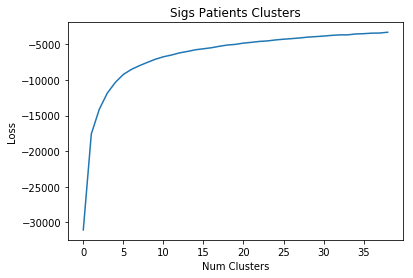

In [333]:
plt.plot(hold_mep)

plt.xlabel('Num Clusters')
plt.ylabel('Loss')
plt.title('Sigs Patients Clusters')

In [334]:
#5 clusters
#Fit 5 clusters to the reduced data
km_mep = KMeans(5,n_init=25)
km_mep.fit(Y_mep)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=25, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

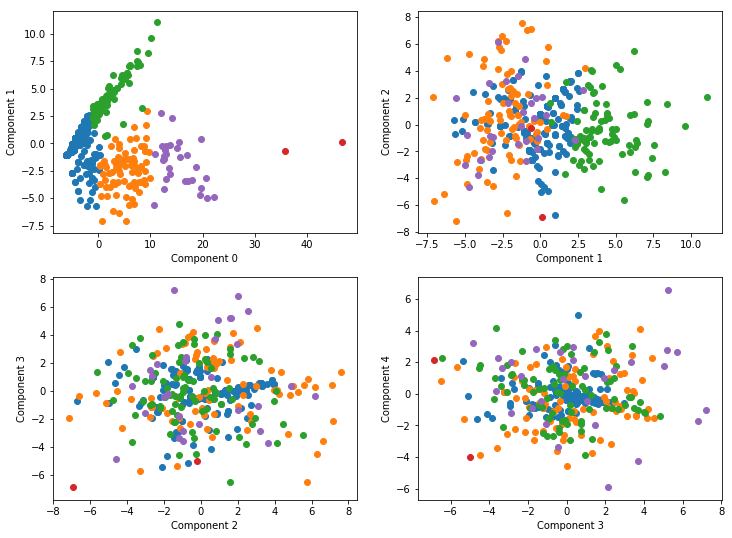

In [335]:
classes = km_mep.predict(Y_mep)
f = plt.figure(figsize=[12,9])
plt.title('Sequence-based Clusters')
plt.subplot(221)
for i in range(7):
    plt.scatter(Y_mep[:,0][classes==i],Y_mep[:,1][classes==i])
#plt.scatter(Y_so1[:,0],Y_so1[:,1],c='k',s=500,marker='x')
plt.xlabel('Component 0')
plt.ylabel('Component 1')

plt.subplot(222)
for i in range(7):
    plt.scatter(Y_mep[:,1][classes==i],Y_mep[:,2][classes==i])
#plt.scatter(Y_so1[:,1],Y_so1[:,2],c='k',s=500,marker='x')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(223)
for i in range(7):
    plt.scatter(Y_mep[:,2][classes==i],Y_mep[:,3][classes==i])
#plt.scatter(Y_so1[:,2],Y_so1[:,3],c='k',s=500,marker='x')
plt.xlabel('Component 2')
plt.ylabel('Component 3')

plt.subplot(224)
for i in range(7):
    plt.scatter(Y_mep[:,3][classes==i],Y_mep[:,4][classes==i])
#plt.scatter(Y_so1[:,3],Y_so1[:,4],c='k',s=500,marker='x')
plt.xlabel('Component 3')
plt.ylabel('Component 4')
